In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

# $\frac{d}{dt}ln\,v(t)^{-1} = v(t)\eta (t)$
# $\; \; \Rightarrow \frac{dv(t)}{dt}=-\eta (t) v^{2}(t)$

## On the other hand, we have:
# $<\eta(t)\eta(t')>=\delta_{D}(t-t')$
# $<\eta(t)\eta(t')>=\frac{1}{dt}$
# $<\sqrt{dt}\ \eta(t)\ \sqrt{dt}\ \eta(t')>=1$
<!-- # we define  -->
# $\eta'(t) \equiv \sqrt{dt}\ \eta(t)$
# $<\eta'(t)\eta'(t')>=1$
# So our new equation is as follows:
# $\frac{dv(t)}{dt}=-\eta (t) v^{2}(t)$
# $\frac{dv(t)}{dt}=-\frac{\eta' (t)}{\sqrt{dt}} v^{2}(t)$
## Since the value of the velocities may be very large, we apply the change of other variables
# $<\frac{\eta'(t)}{c}\frac{\eta'(t')}{c}>=\frac{1}{c^{2}}$
# $\eta''(t) \equiv \frac{\eta'(t)}{c}$
# $\frac{d(cv(t))}{dt}=-\frac{\eta' (t)}{c\sqrt{dt}} (cv)^{2}(t)$
# $\vee \equiv cv $
# $\frac{d\vee(t)}{dt}=-\frac{\eta' (t)}{c\sqrt{dt}} \vee^{2}(t)$
# $\frac{d\vee(t)}{dt}=-\frac{\eta'' (t)}{\sqrt{dt}} \vee^{2}(t)$
### $v(0)=0.1$
### $\vee(0)=0.1c$

In [1]:

dt=.1
C=.01
NE=200  # Number of Ensembles 
T=np.arange(0,10000,dt)
lenT=len(T)


NameError: name 'np' is not defined

In [534]:
@nb.njit()
def RKF(N,vInitial):
    
    v=np.ones(N)*vInitial
#     t=np.zeros(N)
    eta_prime=np.random.normal(0,1/(C**2),N)
    A=lambda v,eta_prime: -eta_prime/(1*np.sqrt(dt))*v**2
    
    
    
    for n in range(0,N-1):
        eta=np.random.normal(0,1,3)
        
        f1=A(v[n],eta[0])
        
        f2=A(v[n]+dt/2*f1,eta[1])
        
        f3=A(v[n]+dt/2*f2,eta[1])
        
        f4=A(v[n]+dt/2*f3,eta[2])

        
        v[n+1]=v[n]+dt/6*(f1+2*f2+2*f3+f4)
#         t[n+1]=t[n]+dt
        
#     x=np.arange(1,(1+(N-1)*dx)+dx,dx)
    return v

In [535]:
@nb.njit(parallel=True)
def Ensamble(N,o=.1*C):
    vl=np.zeros((N,lenT))
    for i in nb.prange(N):
        a=RKF(lenT,o)
#         print(a)
        vl[i,:]=a
    return vl

In [536]:
V=Ensamble(NE)

# Plot an Ensemble 

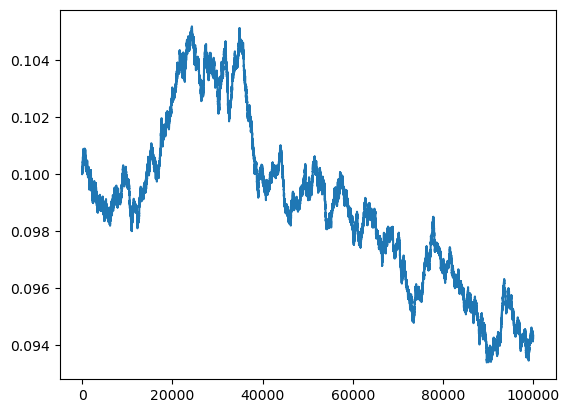

In [560]:
plt.plot(1/C*V[1,:])

# A)

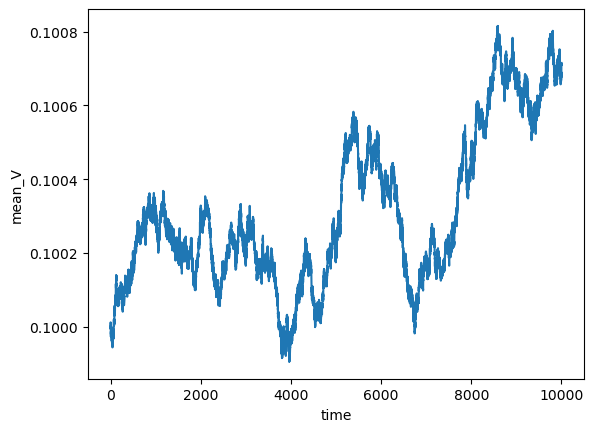

In [539]:
vm=lambda n:np.mean(V[:,n])
vm=np.vectorize(vm)
vavg=1/C*vm(np.arange(lenT))
plt.ylabel("mean_V")
plt.xlabel("time")
plt.plot(T,vavg)

Text(0.5, 0, 'time')

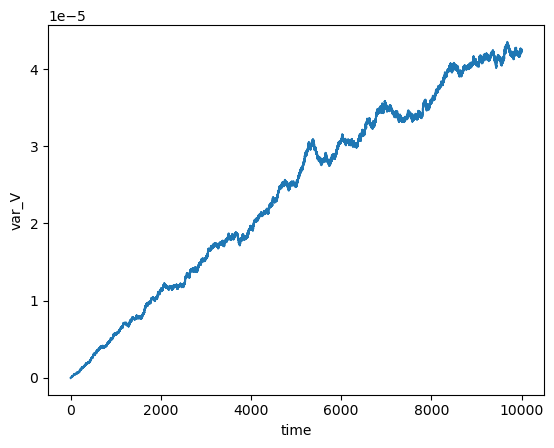

In [545]:
va=lambda n:np.var(1/C*V[:,n])
va=np.vectorize(va)
var=va(np.arange(lenT))
plt.plot(T,var)
plt.ylabel("var_V")
plt.xlabel("time")

In [546]:
def c(Tau,DATA):
    N=len(DATA)
    l=np.zeros(len(Tau))
    k=0
    
    for tau in Tau:
        s=0
        for i in range(N-tau):
            s+=DATA[i]*DATA[i+tau]
        l[k]=(s/(N-tau))    
        k+=1
        
    return l

In [547]:
tau=np.arange(0,9000,300)
cl=c(tau,vavg)

Text(0.5, 0, '$\\tau$')

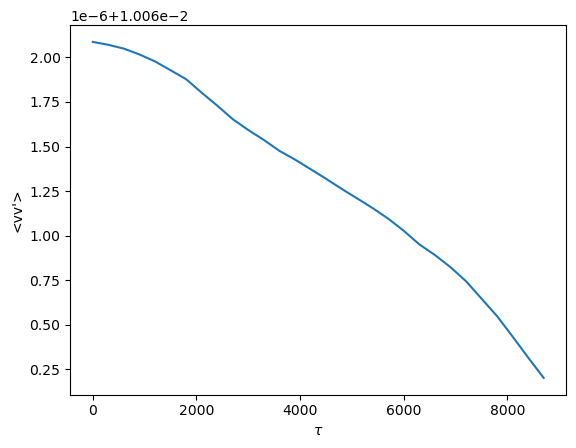

In [554]:
plt.plot(tau,cl)
plt.ylabel("<vv'>")
plt.xlabel(r"$\tau$")

In [572]:
min(cl)

0.010060202338595314

# B)

In [561]:
T[lenT-90000:lenT]

array([1000. , 1000.1, 1000.2, ..., 9999.7, 9999.8, 9999.9])

In [562]:
def PDF(data,dx):

  min_data = np.min(data)
  max_data = np.max(data)

  num_class = int((max_data - min_data)/dx) + 1
  axis = np.linspace(min_data,max_data,num_class)

  pdf = np.zeros(num_class)

  data = data - min_data

  for i in range(len(data)):
    R = int(data[i]/dx)
    pdf[R] += 1       # Top Hat kernel

  pdf = pdf / (np.sum(pdf)*dx)  

  return axis,pdf 

In [563]:
def pdflocalMax(data):
    N=len(data)
    y=[]

    min_data = np.min(data)
    max_data = np.max(data)
    M=500
    dx=(max_data-min_data)/M
#        data = data - min_data
    
    for i in range(2,N-1):
        R1 = int((data[i]-data[i-1])/dx)
        R2 = int((data[i]-data[i+1])/dx)
        if R1>0 and R2>0:
            y.append(T[i])
    return y

Text(0.5, 0, 'time')

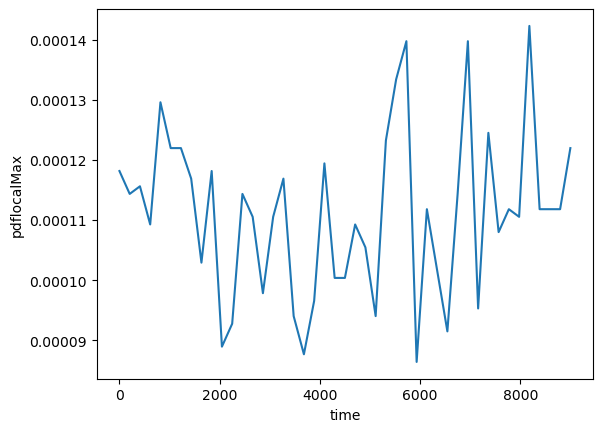

In [564]:
LocalM=pdflocalMax(vavg[lenT-90000:lenT])
a,b=PDF(LocalM,200)
plt.plot(a,b)
plt.ylabel("pdflocalMax")
plt.xlabel("time")

In [565]:
def pdflocalMin(data):
    N=len(data)
    y=[]

    min_data = np.min(data)
    max_data = np.max(data)
    M=500
    dx=(max_data-min_data)/M
#        data = data - min_data
    
    for i in range(2,N-1):
        R1 = int((data[i]-data[i-1])/dx)
        R2 = int((data[i]-data[i+1])/dx)
        if R1<0 and R2<0:
            y.append(T[i])
    return y

Text(0.5, 0, 'time')

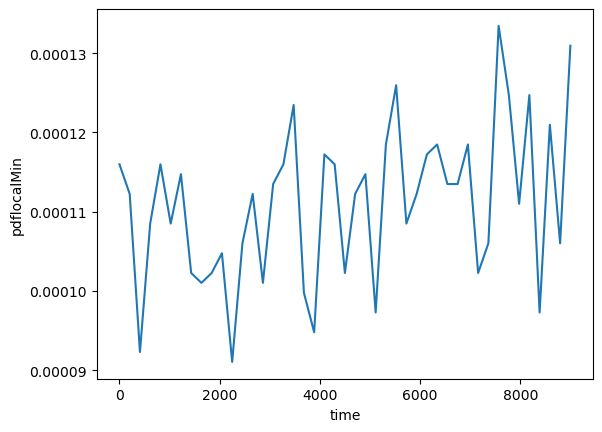

In [566]:
LocalM=pdflocalMin(vavg[lenT-90000:lenT])
T[lenT-90000:lenT]
a,b=PDF(LocalM,200)
plt.plot(a,b)
plt.ylabel("pdflocalMin")
plt.xlabel("time")

In [588]:
def TPCF(data):
    N=len(data)
    min_data = np.min(data)
    max_data = np.max(data)
    M=500
    dx=(max_data-min_data)/M
    
    
    data = data - min_data
    Npeak=0

    p=[]
    for i in range(2,N-1):
        R1 = int((data[i]-data[i-1])/dx)
        R2 = int((data[i]-data[i+1])/dx)
        if R1>0 and R2>0:
            Npeak+=1
            p.append(i)
            
    NpeakR=4*Npeak
    pR=np.random.choice(np.arange(0,N,2),NpeakR,replace=False)
    min_pR = np.min(pR)
    max_pR = np.max(pR)
    MpR=300
    dR=(max_pR-min_pR)/MpR
    
    num_class_pR = MpR+1
    

    
    pdfR = np.zeros(num_class_pR)
    
    for i in range(NpeakR-1):
        for j in range(i+1,NpeakR):
            
            R=np.abs(int((pR[i]-pR[j])/dR))

            pdfR[R] += 1 
            

    min_p = np.min(p)
    max_p = np.max(p)
    
    dR=(max_p-min_p)/MpR
    
    num_class_p = MpR+1

    
    pdf = np.zeros(num_class_p)
    
    for i in range(1,Npeak-1):
        for j in range(i+1,Npeak):
            
            R=np.abs(int((p[i]-p[j])/dR))
            pdf[R] += 1 
                
    LR=np.arange(MpR+1)
    c=(NpeakR*(NpeakR-1))/(Npeak*(Npeak-1))
    pperp=pdf[:-125]/pdfR[:-125]
    f=pperp*c-1

    f[0]=-1
    plt.plot(LR[:-125]*dR,f,label="$\psi(t) \; for \; t \; in \; [1000,10000]$")
    plt.legend()

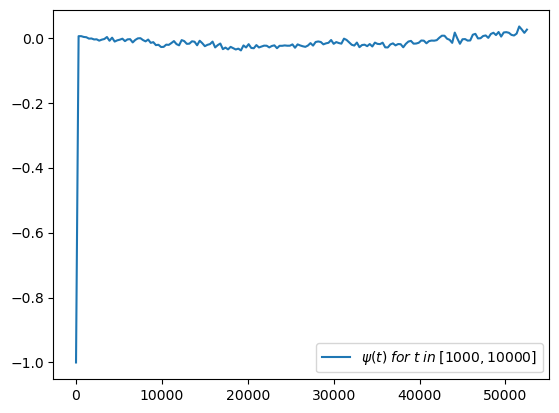

In [589]:
TPCF(vavg[lenT-90000:lenT])

In [590]:
def sigma(Tau,my_data):
    sigmalist=[]
    for tau in Tau:
        my_data=list(my_data)
        N=len(my_data)
        M=np.ceil(N/tau).astype(int)
        datas = []

        j=0
        for i in range(M):
            datas.append(my_data[j:j+tau])
            j+=tau
        sum_sigmas=0
        for _ in range(M):
            sum_sigmas+=np.sqrt(np.var(datas[_]))
        sigmalist.append(sum_sigmas/M)
    return sigmalist

In [591]:
tauS=np.arange(100,7000,300)
sigmaS=sigma(tauS,vavg)

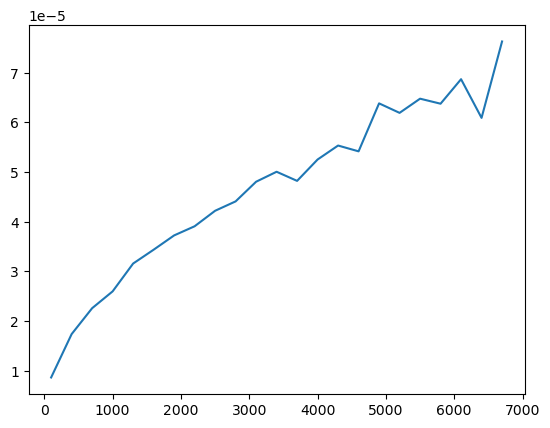

In [592]:
plt.plot(tauS,sigmaS)

## Our data isn't stationary so we can't generalize our resualt
## I use (http://facultymembers.sbu.ac.ir/movahed/attachments/comp01_4.pdf)